# Image Analysis in python


## Setup

In [64]:
# I used this photoshop tutorial of how to make a Nashville filter
# as a guideline. It gave me ideas for what functions I should try
# to incorporate into my custom filter.
# http://photodoto.com/instagram-filters-in-photoshop-nashville-1997/

# - Contrast
# - Gamma
# - Peach yellow (#F6D8AC) tint
# - Color input adjustment

# Bring in necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage import img_as_ubyte, img_as_float, color, exposure
import glob

# Set defaults
plt.rcParams['image.cmap'] = 'gray' # Display grayscale images in... grayscale.
plt.rcParams['image.interpolation'] = 'none' # Use nearest-neighbour

## My own Instagram Nashville filter

## Contrast

In [65]:
# http://scikit-image.org/docs/dev/api/skimage.exposure.html

# Performs a contrast adjustment. This function transforms
# the input image pixelwise according to the equation 
# O = 1/(1 + exp*(gain*(cutoff - I))) after scaling each
# pixel to the range 0 to 1.
def adjust_contrast(image, cutoff=.5, gain=1):
    return exposure.adjust_sigmoid(image, cutoff=cutoff, gain=gain, inv=False);

## Gamma

In [66]:
# http://scikit-image.org/docs/dev/api/skimage.exposure.html

# Performs Gamma Correction on the input image. This function transforms 
# the input image pixelwise according to the equation O = I**gamma after
# scaling each pixel to the range 0 to 1.
def adjust_gamma(image, gamma = 1, gain = 1):
    return exposure.adjust_gamma(image, gamma=gamma, gain=gain);

## Tint and Input Color

In [67]:
# Add a color tint to the image and adjust the input color start.
# For example, if the color start is 20 for the red channel then
# it will take the current red values in the range of 0..255 and adjust
# them to be in the range 20..255
def tint(img, red_scale = 1, green_scale = 1, blue_scale = 1,
         red_input_color = 0, green_input_color = 0, blue_input_color = 0):
    
    tinted_img = img.copy() 
    width, height, _ = np.shape(tinted_img)
    for x in range(width):
        for y in range(height):
            tinted_img[x][y][0] = (float(tinted_img[x][y][0]) * 255 / 255 + red_input_color) * red_scale
            tinted_img[x][y][1] = (float(tinted_img[x][y][1]) * 237 / 255 + green_input_color) * green_scale
            tinted_img[x][y][2] = (float(tinted_img[x][y][2]) * 167 / 255 + blue_input_color) * blue_scale
            
    tinted_img = img_as_ubyte(tinted_img)
    return tinted_img

## Setup images

In [68]:
# Import normal and instagram images.
imgpaths = glob.glob("./images/*-normal.jpg") + glob.glob("./images/*-normal.png")
imgset = [img_as_ubyte(mpimg.imread(x)) for x in imgpaths]
insta_imgpaths = glob.glob("./images/*-insta.jpg") + glob.glob("./images/*-insta.png")
insta_imgset = [img_as_ubyte(mpimg.imread(x)) for x in insta_imgpaths]

before_and_after_filter_images = zip(imgset, insta_imgset)



## Plot a comparison between the images

In [69]:
# Plots a histogram of the image, splitting into individual channels if necessary.
def plot_multichannel_histo(img):
    if img.ndim == 2: # plot grayscale histo
        plt.hist(img.flatten(), 256,  range=(0,255), color='k', histtype='step')
    elif img.ndim == 3: # print rgb histo
        plt.hist(img.reshape(-1,3), 256,  range=(0,255), color=['r','g','b'], histtype='step')
    else: # Not an image
        print("Must pass a valid RGB or grayscale image")
    plt.xlim([0,255])

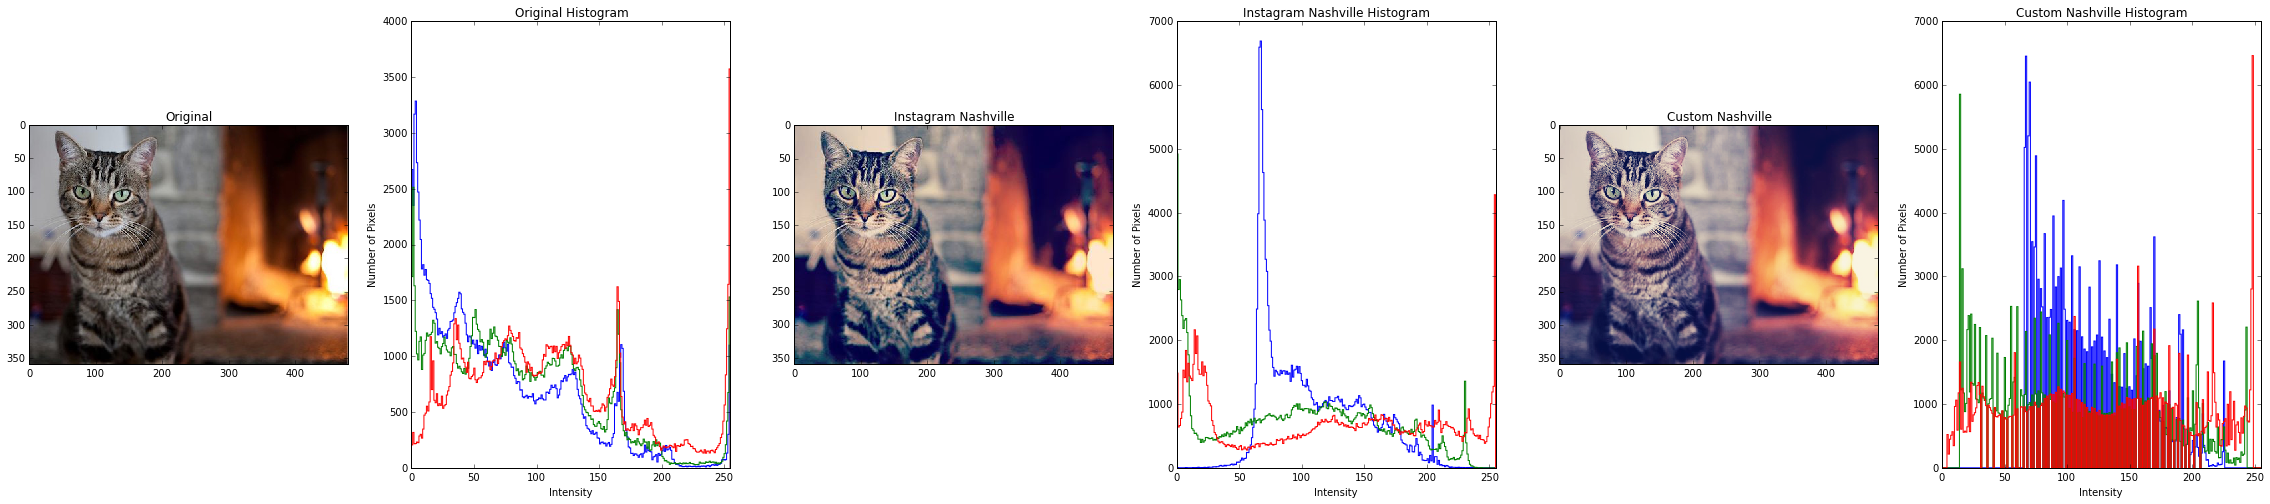

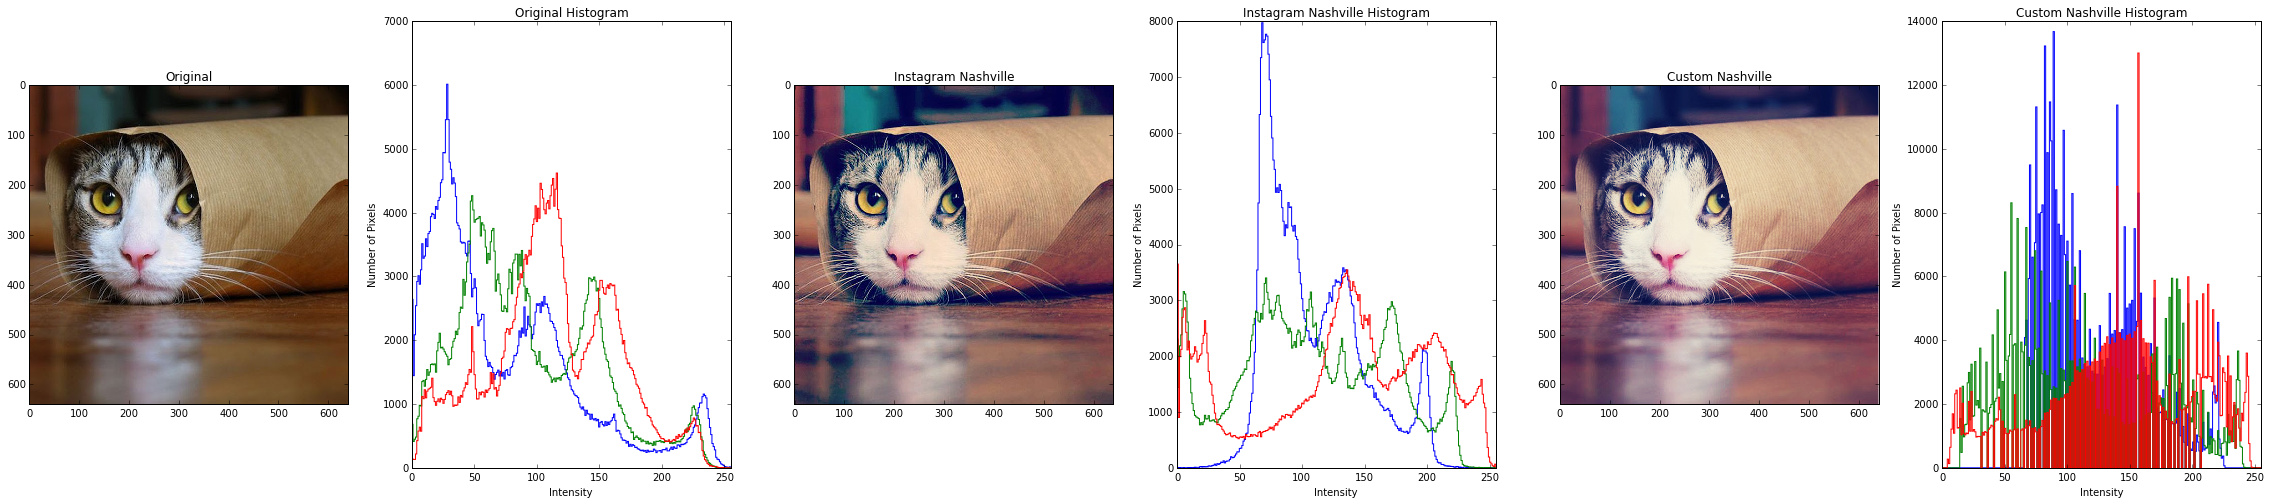

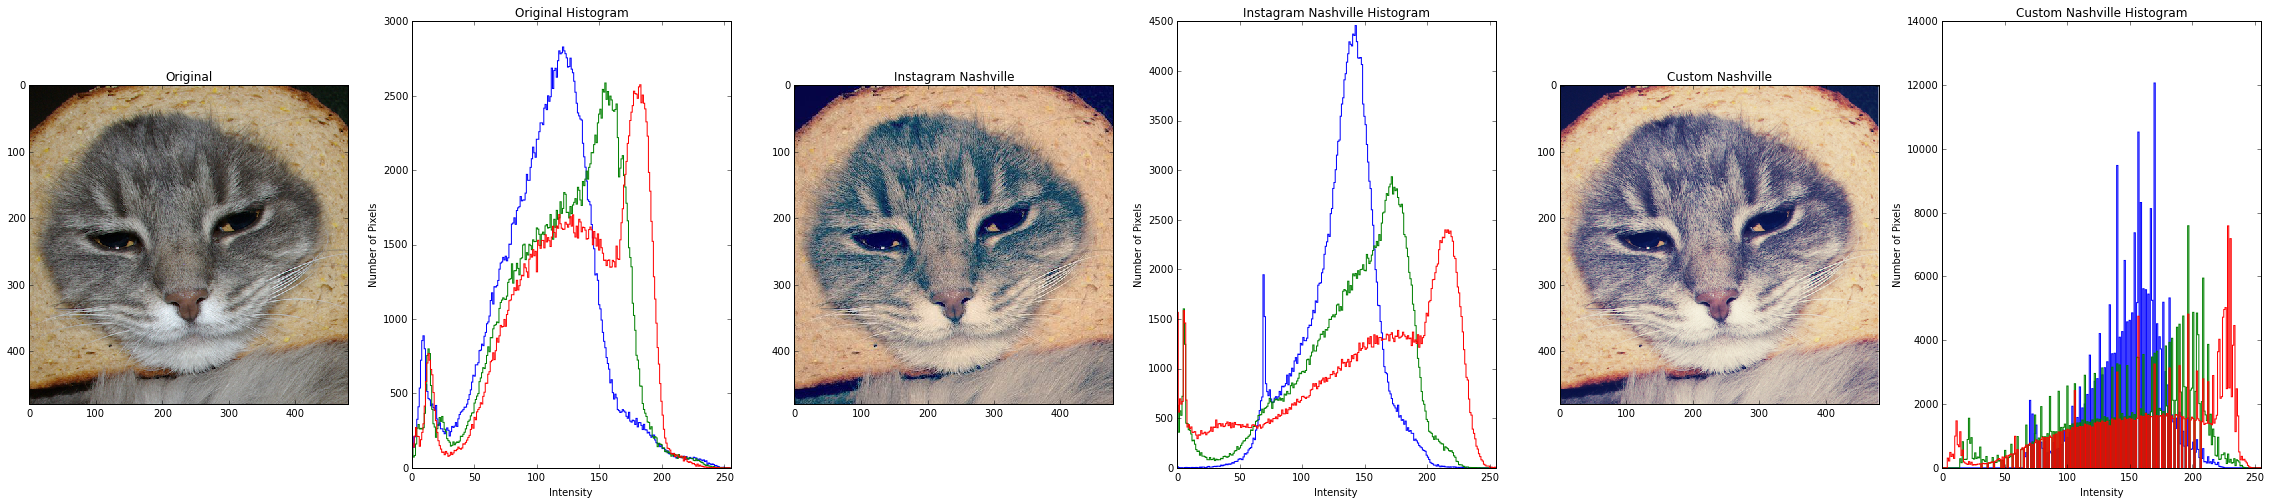

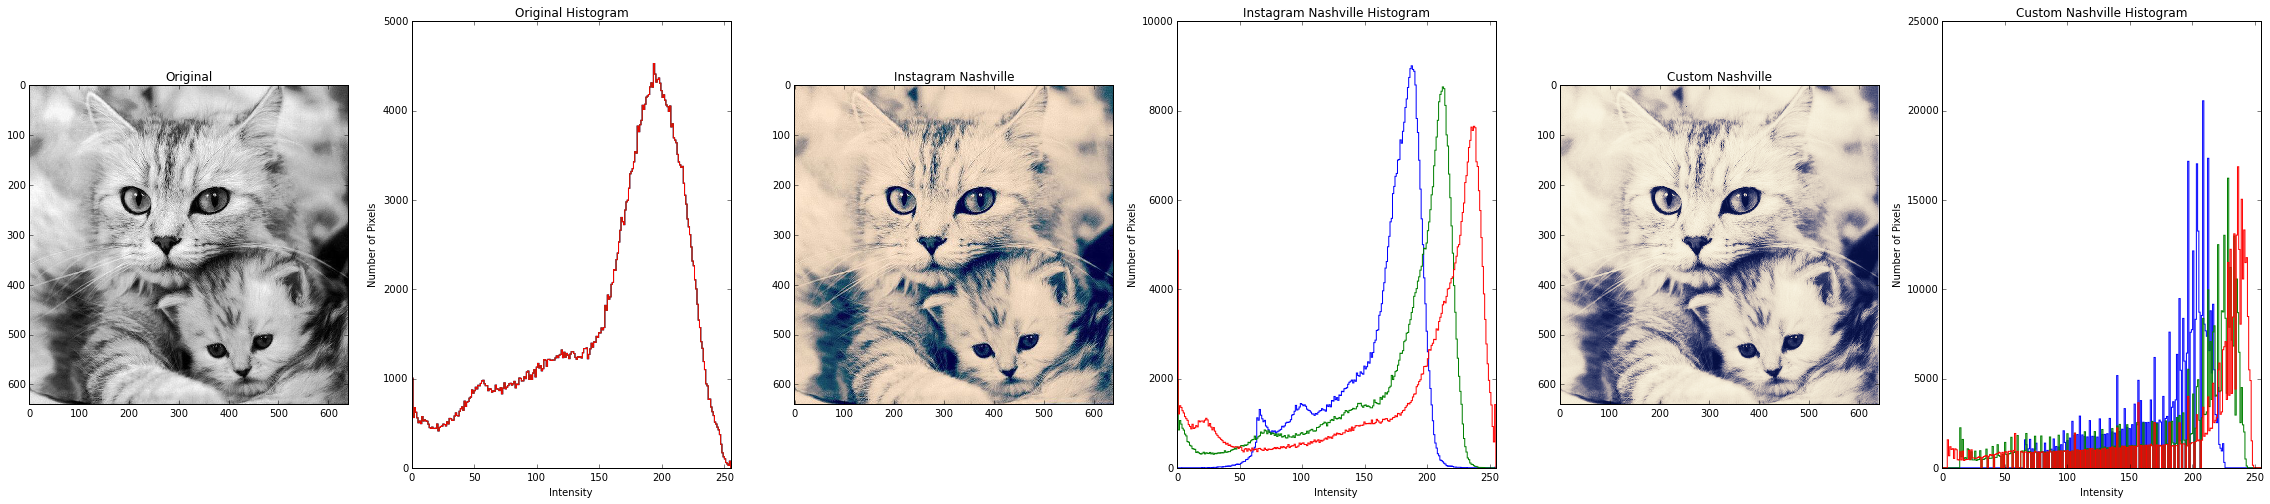

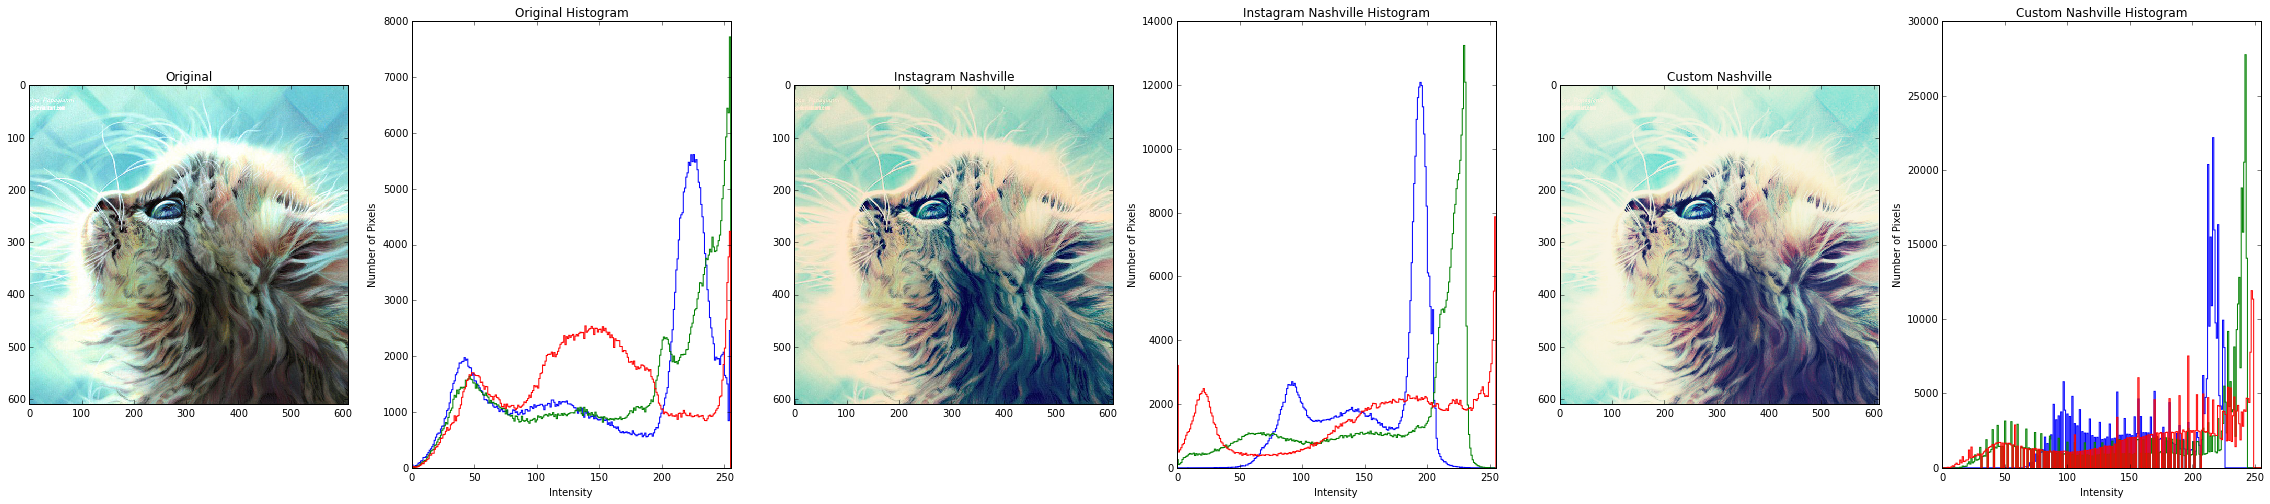

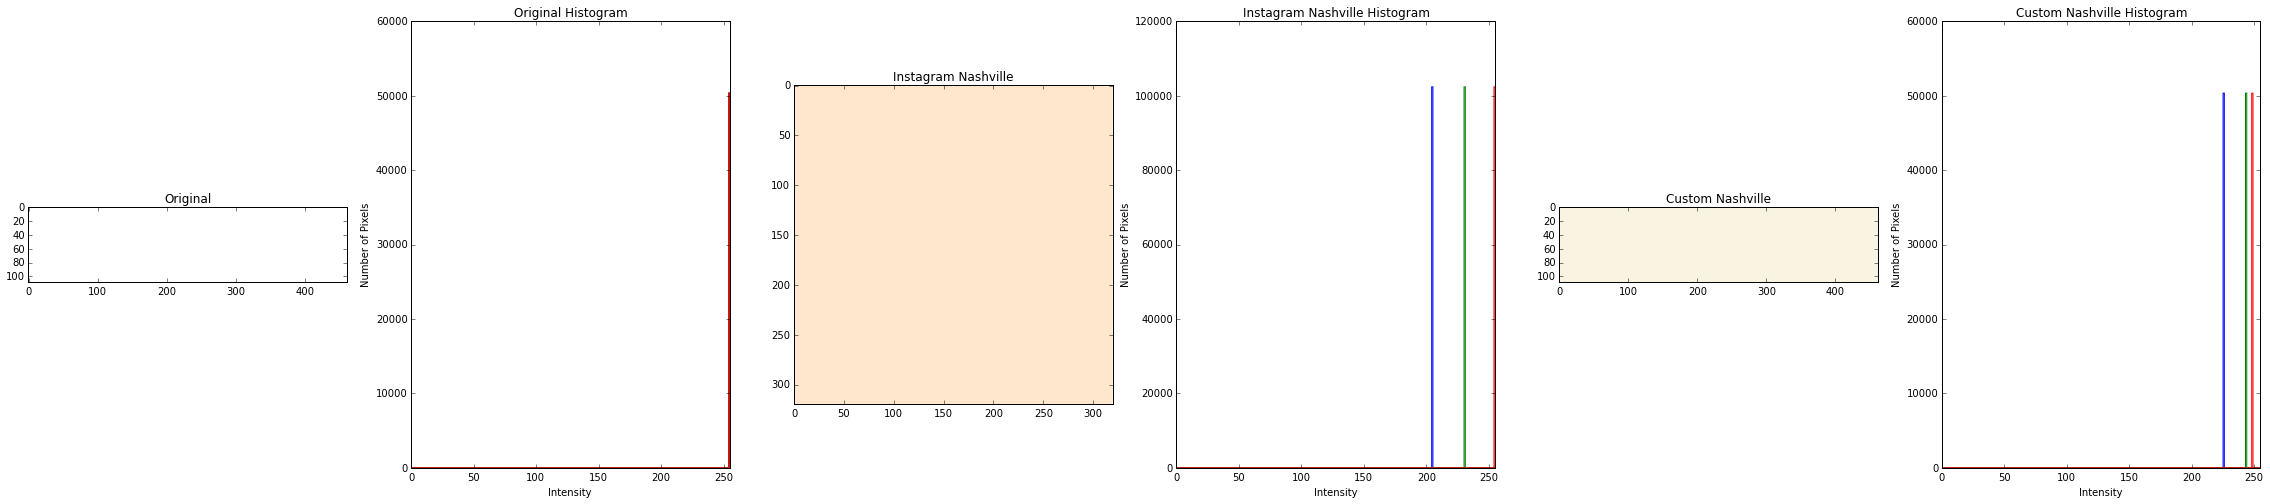

In [70]:
# Apply
# - Contrast
# - Gamma
# - Peach yellow (#F6D8AC) tint
# - Color input adjustment
# to the normal imgset.
# Plot all of the images and a graph their colors.
for i,img in enumerate(before_and_after_filter_images):
    
    # RGB	246	216	172
    # Peach Yellow (#F6D8AC)
    
    # Tan like filter:
    # red_scale: 246 / 255 = .965
    # green_scale: 216 / 255 = .847
    # blue_scale: 172 / 255 = .6745
    
    custom_img = tint(img[0], .965, .847, .6745, 0, 18, 88)
    custom_img = adjust_gamma(custom_img, gamma = .68, gain = 1)
    custom_img = adjust_contrast(custom_img, cutoff = .5, gain = 8)
    
    plt.figure(figsize=(40, 8))
    plt.tight_layout
    plt.subplot(1, 6, 1)
    plt.title('Original')
    plt.imshow(img[0], cmap='gray')
    plt.subplot(1, 6, 2)
    plt.title('Original Histogram')
    plt.xlabel('Intensity')
    plt.ylabel('Number of Pixels')
    plot_multichannel_histo(img[0])
    plt.subplot(1, 6, 3)
    plt.title('Instagram Nashville')
    plt.imshow(img[1], cmap='gray')
    plt.subplot(1, 6, 4)
    plt.title('Instagram Nashville Histogram')
    plt.xlabel('Intensity')
    plt.ylabel('Number of Pixels')
    plot_multichannel_histo(img[1])
    plt.subplot(1, 6, 5)
    plt.title('Custom Nashville')
    plt.imshow(custom_img, cmap='gray')
    plt.subplot(1, 6, 6)
    plt.title('Custom Nashville Histogram')
    plt.xlabel('Intensity')
    plt.ylabel('Number of Pixels')
    plot_multichannel_histo(custom_img)